<a href="https://colab.research.google.com/github/akkipant/CS5542-Big-Data-Analytics-and-Applications/blob/master/ICP-11/Source/BDA_ICP_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import sys
import cv2
import random
import numpy as np
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow
from keras import backend as K
import matplotlib.pyplot as plt


In [2]:
! pip install -q kaggle


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syedshah8108","key":"9fb2b617f308c1a06bca96dd76a43e63"}'}

upload the kaagle.json file you created earlier 

In [4]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-23 12:01:34           8188  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-23 06:03:57           4083  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           3332  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           439MB  2020-11-23 21:42:31            634  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

dowlowad the data set by executing the following code

In [7]:

!kaggle competitions download -c data-science-bowl-2018

  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 56.8MB/s]
  0% 0.00/9.10M [00:00<?, ?B/s]
100% 9.10M/9.10M [00:00<00:00, 83.7MB/s]
  0% 0.00/112k [00:00<?, ?B/s]
100% 112k/112k [00:00<00:00, 119MB/s]
 97% 269M/276M [00:01<00:00, 212MB/s]
100% 276M/276M [00:01<00:00, 195MB/s]
  0% 0.00/2.67M [00:00<?, ?B/s]
100% 2.67M/2.67M [00:00<00:00, 181MB/s]
  0% 0.00/2.62k [00:00<?, ?B/s]
100% 2.62k/2.62k [00:00<00:00, 2.71MB/s]
 94% 74.0M/79.1M [00:01<00:00, 26.4MB/s]
100% 79.1M/79.1M [00:01<00:00, 43.2MB/s]


create a new directory to unzip the data 

In [8]:
! mkdir train

## unzip the data file


In [9]:
! unzip /content/stage1_train.zip -d train >> a.txt

In [10]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [11]:
DATA_PATH = '/content/train/'


seed = 42
random.seed = seed
np.random.seed = seed

image_ids = next(os.walk(DATA_PATH))[1]

X = np.zeros((len(image_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y = np.zeros((len(image_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

for n, id_ in tqdm(enumerate(image_ids), total=len(image_ids)):
    path = DATA_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH), )
    X[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(cv2.resize(mask_, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA), axis=-1)
        mask = np.maximum(mask, mask_)
    Y[n] = mask

x_train=X

y_train=Y

100%|██████████| 670/670 [01:09<00:00,  9.57it/s]


In [18]:
# Build U-Net model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c4)

p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

# Added One more layer to the Encoder to get more features

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c5)

# Added 2 layers to the bottleneck to get uniform training curve and slow training
cf = tf.keras.layers.Conv2D(512, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p5)
cf = tf.keras.layers.Dropout(0.3)(cf)
cf = tf.keras.layers.Conv2D(512, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(cf)
cf = tf.keras.layers.Dropout(0.3)(cf)
cf = tf.keras.layers.Conv2D(512, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(cf)
cf = tf.keras.layers.Dropout(0.3)(cf)
cf = tf.keras.layers.Conv2D(512, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(cf)

# Decoder layer for the added layer in encoder
u5 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(cf)
u5 = tf.keras.layers.concatenate([u5, c5])
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u5)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c5)

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In segmentation problems accuracy sometime can be a misleading and therefore a more reliable paramete, Dice score, is used to evaluate the model performance

In [19]:
def dice_acc(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

compiling the model

In [20]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
#Changed loss function to Mean Squared Error
model.compile(optimizer='adam', loss='MSE', metrics=[dice_acc])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 128, 128, 16) 0           conv2d_25[0][0]                  
_______________________________________________________________________________________

For training, input images and their corresponding segmentation maps are used to train the network

In [21]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', verbose=1),
  tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  cp_callback 
]
#Changed the split size and number of epochs
results = model.fit(x_train, y_train, validation_split=0.3, batch_size=16, epochs=50,callbacks=callbacks)

Epoch 1/50
37/38 [============================>.] - ETA: 0s - loss: 0.1248 - dice_acc: 0.2991
Epoch 00001: saving model to training_1/cp.ckpt
38/38 [==============================] - 3s 86ms/step - loss: 0.1232 - dice_acc: 0.3070 - val_loss: 0.0818 - val_dice_acc: 0.5210
Epoch 2/50
37/38 [============================>.] - ETA: 0s - loss: 0.0564 - dice_acc: 0.6570
Epoch 00002: saving model to training_1/cp.ckpt
38/38 [==============================] - 3s 70ms/step - loss: 0.0559 - dice_acc: 0.6563 - val_loss: 0.0569 - val_dice_acc: 0.7065
Epoch 3/50
37/38 [============================>.] - ETA: 0s - loss: 0.0425 - dice_acc: 0.7405
Epoch 00003: saving model to training_1/cp.ckpt
38/38 [==============================] - 3s 69ms/step - loss: 0.0424 - dice_acc: 0.7425 - val_loss: 0.0423 - val_dice_acc: 0.7685
Epoch 4/50
37/38 [============================>.] - ETA: 0s - loss: 0.0359 - dice_acc: 0.7814
Epoch 00004: saving model to training_1/cp.ckpt
38/38 [==============================] - 3

visualizing the model performance

1/1 [==============================] - 0s 4ms/step


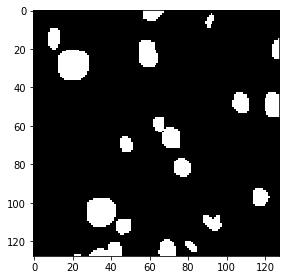

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


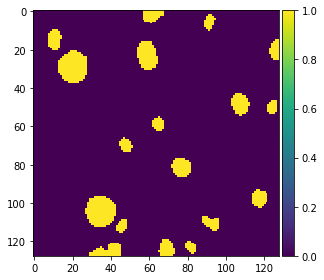

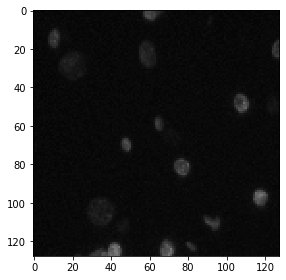

In [25]:
idx = random.randint(0, len(x_train))
x=np.array(x_train[idx])
x=np.expand_dims(x, axis=0)
predict = model.predict(x, verbose=1)

predict = (predict > 0.5).astype(np.uint8)

imshow(np.squeeze(y_train[idx]))
plt.show()

imshow(np.squeeze(predict[0]))
plt.show()

imshow(x_train[idx])

plt.show()